# Machine Learning - Unsupervised Learning and Feature Engineering

## Unit 1. Introduction to Unsupervised Machine Learning and Feature Engineering

Lecturer: Tai Le Quy

Thanks Prof. Dr. Christian Müller-Kett

This notebook is based on Python version on https://github.com/iubh/DLBDSMLUSL01

### 1. Example 1

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime

In [2]:
# create sample data
Student_R = {'Student_ID':['S1', 'S2', 'S3'], 
    'Birth_date': [datetime.date(1996,7,14), 
                   datetime.date(1997,8,22), 
                   datetime.date(1998,5,11)]}

Student_R = pd.DataFrame(Student_R, columns = ['Student_ID','Birth_date'])

Courses = { 'Student_ID':['S1', 'S2', 'S3', 'S1', 'S2', 'S3'], 'Grades':[18, 11, 12, 15, 19, 10]}

Courses = pd.DataFrame (Courses, columns = ['Student_ID', 'Grades'])

In [6]:
Student_R

,Student_ID,Birth_date,year
0,S1,1996-07-14,1996
1,S2,1997-08-22,1997
2,S3,1998-05-11,1998


In [7]:
Courses

,Student_ID,Grades
0,S1,18
1,S2,11
2,S3,12
3,S1,15
4,S2,19
5,S3,10


In [3]:
#%% extracting the year from the birth date
Student_R['year'] = pd.DatetimeIndex(Student_R['Birth_date']).year
print(Student_R.head())
# console output:
#   Student_ID  Birth_date  year
# 0         S1  1996-07-14  1996
# 1         S2  1997-08-22  1997
# 2         S3  1998-05-11  1998

  Student_ID  Birth_date  year
0         S1  1996-07-14  1996
1         S2  1997-08-22  1997
2         S3  1998-05-11  1998


In [4]:
#%% creation of features by aggregation of grouped values
goper = Courses.groupby('Student_ID')['Grades'].\
    agg(['mean','max','min'])

In [8]:
# rename columns
goper.columns = ['mean_grade','max_grade','min_grade']
print(goper.head())
# console output:
#             mean_grade  max_grade  min_grade
# Student_ID                                  
# S1                16.5         18         15
# S2                15.0         19         11
# S3                11.0         12         10

            mean_grade  max_grade  min_grade
Student_ID                                  
S1                16.5         18         15
S2                15.0         19         11
S3                11.0         12         10


In [9]:
#%% merge with the Student_R dataframe
R = Student_R.merge(goper, left_on = 'Student_ID', \
    right_index=True, how = 'left'). \
        head()
# show the dataframe
R
#   Student_ID  Birth_date  year  mean_grade  max_grade  min_grade
# 0         S1  1996-07-14  1996        16.5         18         15
# 1         S2  1997-08-22  1997        15.0         19         11
# 2         S3  1998-05-11  1998        11.0         12         10

,Student_ID,Birth_date,year,mean_grade,max_grade,min_grade
0,S1,1996-07-14,1996,16.5,18,15
1,S2,1997-08-22,1997,15.0,19,11
2,S3,1998-05-11,1998,11.0,12,10


### 2. Example 2
In this example, we will see how we can use Python to extract added value within a dataset based on dates.


In [7]:
# load the required packages
import pandas as pd
from scipy.stats import spearmanr
from datetime import date
import seaborn as sns

In [8]:
#%% load the data
dat = pd.read_csv('data_visitors.csv', delimiter=' ')

In [9]:
#%% glimpse at the data
dat

,date,visitors
0,2021-01-01,2735
1,2021-01-02,2084
2,2021-01-03,647
3,2021-01-04,1098
4,2021-01-05,1778
...,...,...
360,2021-12-27,536
361,2021-12-28,277
362,2021-12-29,842
363,2021-12-30,1163


In [11]:
#%% correlate the date and the visitors
spearmanr(dat['date'], dat['visitors'])
#Calculate a Spearman correlation coefficient with associated p-value.
# The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship
# between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation
# Correlations of -1 or +1 imply an exact monotonic relationship. 
# Positive correlations imply that as x increases, so does y. 
# Negative correlations imply that as x increases, y decreases.

SpearmanrResult(correlation=0.0010369613036009904, pvalue=0.9842482530265125)

In [12]:
#%% define the date as such
dat['date'] = pd.to_datetime(dat['date'])

In [13]:
#%% extract the weekdays from the date (Monday is 0 and Sunday is 6)
dat['weekday'] = dat['date'].apply(lambda date: date.weekday())

In [14]:
#%% glimpse at the data
dat

,date,visitors,weekday
0,2021-01-01,2735,4
1,2021-01-02,2084,5
2,2021-01-03,647,6
3,2021-01-04,1098,0
4,2021-01-05,1778,1
...,...,...,...
360,2021-12-27,536,0
361,2021-12-28,277,1
362,2021-12-29,842,2
363,2021-12-30,1163,3


In [15]:
#%% extract the weekends
dat['weekend'] = dat['weekday'].apply(lambda weekday: 0 if (weekday < 5) else 1)

In [16]:
#%% glimpse at the data
dat

,date,visitors,weekday,weekend
0,2021-01-01,2735,4,0
1,2021-01-02,2084,5,1
2,2021-01-03,647,6,1
3,2021-01-04,1098,0,0
4,2021-01-05,1778,1,0
...,...,...,...,...
360,2021-12-27,536,0,0
361,2021-12-28,277,1,0
362,2021-12-29,842,2,0
363,2021-12-30,1163,3,0


In [17]:
#%% correlate the weekends and the visitors
spearmanr(dat['weekend'], dat['visitors'])

SpearmanrResult(correlation=0.20095637220308932, pvalue=0.00011081519702575257)

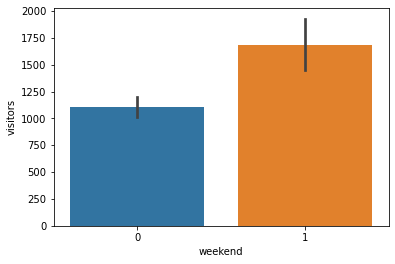

In [18]:
#%% visually glimpse at the data
ax = sns.barplot(x="weekend", y="visitors", data=dat)
# %%